In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns
import pandas as pd

sns.set(style="ticks")

IMAGING_FRAMERATE = 1/(34704.0/1e6)



In [39]:
blacklist = ['20180312/Experiment_11', '20180312/Experiment_12', '20180312/Experiment_13', '20180315', '20180419/Experiment_1', '20180419/Experiment_2', '20180420', '20180424']

In [46]:
#AUTOMATIC EXPERIMENT SELECTOR
directories = ["/media/gu4n1n3/Data2/2_mice/"]#, "/media/gu4n1n3/Data3/2_mice/"]
ws='3800' # window size of data analsyis

full_separation_files = []
together_files = []
b_together = False
skip = False
for directory in directories:
    for root, dirs, files in os.walk(directory):
        if "Experiment" in root and "Behaviour" not in root:
            for bl_file in blacklist:
                if bl_file in root:
                    skip = True
                    break
                else:
                    skip = False
            for file in files:
                if 'together' in file:
                    b_together = True
                elif 'full_separation' in file:
                    b_together = False
            if not skip:
                for file in files:
                    if '3800' in file:
                        if "frequency_split_correlation" in file and 'GFP' not in file:
                            if b_together:
                                together_files.append(os.path.join(root,file))
                            else:
                                full_separation_files.append(os.path.join(root,file))
                
#     if "Behaviour" in root:
#         for file in files:
#             if 'timestamps' in file:
#                 timestamps_file = os.path.join(directory, experiment, root, file)
#             elif 'subset' in file and 'raw' in file:
#                 subset_behaviour_file = os.path.join(directory, experiment, root, file)
#             elif 'h264' in file:
#                 video_file = os.path.join(directory, experiment, root, file)
#     else:
#         print(files)
#         for file in files:
#             if 'combined' in file and "raw" in file and 'upscaled' not in file:
#                 if not 'gsr' in file:
#                     if 'bandpass' in file:
#                         combined_file = os.path.join(directory, experiment, root, file)
#             elif 'LEFT_corrected_g_by_b' in file:
#                 left_mouse_processed_file = os.path.join(directory, experiment, root, file)
#             elif 'RIGHT_corrected_g_by_b' in file:
#             #elif 'RIGHT_GREEN_processed' in file:
#                 right_mouse_processed_file = os.path.join(directory, experiment, root, file)
#             elif 'LEFT_RAW_GREEN_FRAME' in file:
#                 left_green_frame_file = os.path.join(directory, experiment, root, file)
#             elif 'RIGHT_RAW_GREEN_FRAME' in file:
#                 right_green_frame_file = os.path.join(directory, experiment, root, file)
print(together_files)
print()
print(full_separation_files)
#date = left_mouse_processed_file.split("/")[5]
#title = left_mouse_processed_file.split('/')[-1].split('.raw')[0]

['/media/gu4n1n3/Data2/2_mice/20180312/Experiment_2/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180312/Experiment_10/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180312/Experiment_8/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180312/Experiment_4/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180312/Experiment_6/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180316/Experiment_1/frequency_split_correlation_filtered_ws=3800.py.npy']

['/media/gu4n1n3/Data2/2_mice/20180312/Experiment_7/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180312/Experiment_9/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180312/Experiment_5/frequency_split_correlation_filtered_ws=3800.py.npy', '/media/gu4n1n3/Data2/2_mice/20180312/Experiment_3/

In [47]:
# Average the Separate Experiments
separate_exps_matrices = []
for file in full_separation_files:
    separate_exps_matrices.append(np.load(file))
    
min_shape = 10000000
for matrix in separate_exps_matrices:
    if matrix.shape[1] < min_shape:
        min_shape = matrix.shape[1]
        
arr_separate_exps = np.zeros((len(separate_exps_matrices), separate_exps_matrices[0].shape[0], min_shape))
arr_separate_points = np.zeros((len(separate_exps_matrices)))
for i in range(len(separate_exps_matrices)):
    arr_separate_exps[i] = separate_exps_matrices[i][:, :min_shape]
    midpoint = separate_exps_matrices[0].shape[1]//2-int(ws)//2
    arr_separate_points[i] = np.mean(separate_exps_matrices[i][0, midpoint-10:midpoint+10])


In [48]:
# Average the together experiments
together_exps_matrices = []
for file in together_files:
    together_exps_matrices.append(np.load(file))
    
    
min_shape = 10000000
for matrix in together_exps_matrices:
    if matrix.shape[1] < min_shape:
        min_shape = matrix.shape[1]
        
arr_together_exps = np.zeros((len(together_exps_matrices), together_exps_matrices[0].shape[0], min_shape))
arr_together_points = np.zeros((len(together_exps_matrices)))
for i in range(len(together_exps_matrices)):
    arr_together_exps[i] = together_exps_matrices[i][:, :min_shape]
    midpoint = separate_exps_matrices[0].shape[1]//2-int(ws)//2
    arr_together_points[i] = np.mean(together_exps_matrices[i][0, midpoint-10:midpoint+10])


# Average the two types of experiments

In [49]:
mean_separate_exp = np.mean(arr_separate_exps, axis=0)
mean_together_exp = np.mean(arr_together_exps, axis=0)

max_x_value = mean_separate_exp.shape[1]/IMAGING_FRAMERATE

In [50]:
frequency_bands = [0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0, 12.0]

frequency_labels = []

for i in range(len(frequency_bands)-1):
    if i == 0:
        frequency_labels.append(str(frequency_bands[i])+'-'+str(frequency_bands[i+1])+" Hz")
    else:
        frequency_labels.append(str(frequency_bands[i])+'-'+str(frequency_bands[i+1]))
y_ticks = np.arange(np.shape(frequency_bands)[0])-0.5
y_ticks = np.flipud(y_ticks)

<IPython.core.display.Javascript object>


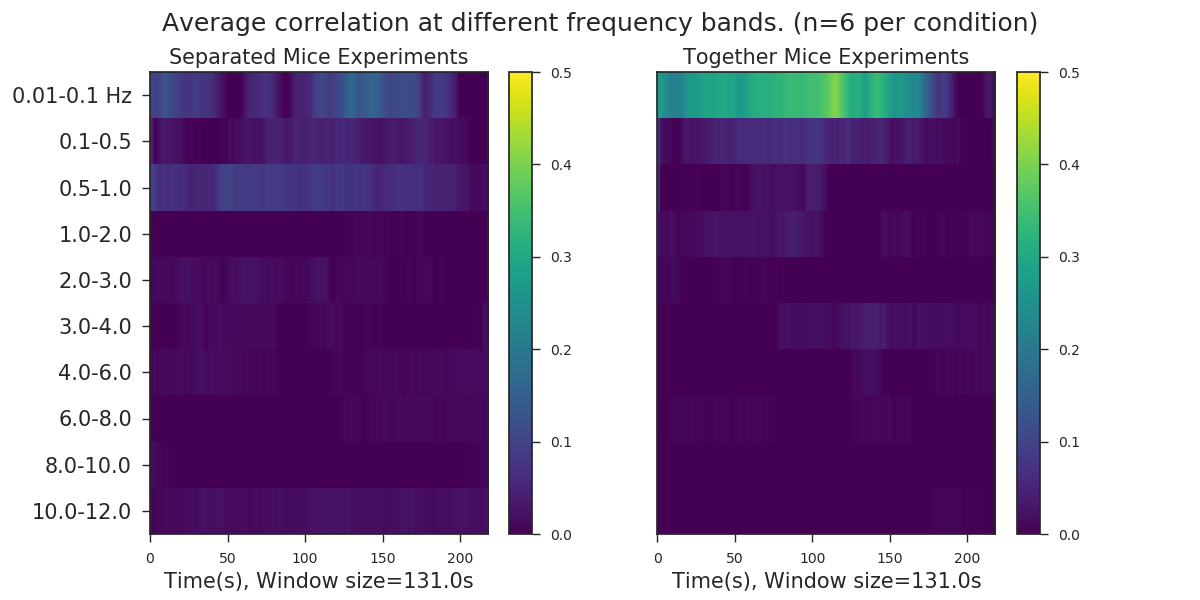

In [51]:
plt.figure(figsize=(12, 6))
plt.suptitle("Average correlation at different frequency bands. (n=%s per condition)" %str(arr_separate_exps.shape[0]), size=18)
plt.subplot(121)
plt.title("Separated Mice Experiments", size=15)
plt.yticks(y_ticks, frequency_labels, size=15)
plt.imshow(mean_separate_exp, cmap='viridis', extent=[0,max_x_value,0,10], aspect='auto', vmin=0, vmax=0.5)
plt.xlabel("Time(s), Window size=%ss"%(int(ws)//IMAGING_FRAMERATE), size=15)
plt.colorbar()
plt.subplot(122)
plt.title("Together Mice Experiments", size=15)
plt.yticks([])
plt.imshow(mean_together_exp, cmap='viridis',  extent=[0,max_x_value,0,10], aspect='auto', vmin=0, vmax=0.5)
plt.xlabel("Time(s), Window size=%ss"%(int(ws)//IMAGING_FRAMERATE), size=15)

plt.colorbar()

In [52]:
z_score, p_value = scipy.stats.ttest_ind(arr_separate_points, arr_together_points)
p_value

0.02658900880786638

In [25]:
data_frame = {}
data_frame['Separated'] = arr_separate_points
data_frame['Together'] = arr_together_points

df = pd.DataFrame(data_frame)

<IPython.core.display.Javascript object>


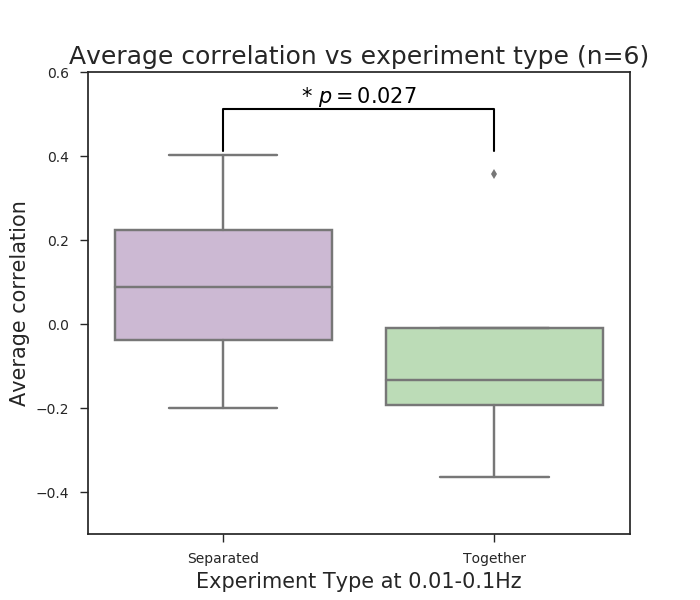

Text(0.5,0.512797,'* $p=0.027$')

In [55]:
plt.figure(figsize=(7,6))
plt.title("Average correlation vs experiment type (n=%s)"%(arr_separate_exps.shape[0]), size=18)
plt.ylabel("Average correlation", size=15)
plt.xlabel("Experiment Type at 0.01-0.1Hz", size=15)
sns.boxplot(data=df, palette="PRGn")

x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df.max().max()+0.01, 0.1, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.ylim([-.5, .6])
plt.text((x1+x2)*.5, y+h, r"* $p=%s$"%str(round(p_value, 3)) %p_value, ha='center', va='bottom', color=col, size=15)